Conjunto de datos bancarios - Objetivos de marketing
Los depósitos a plazo son una fuente importante de ingresos para un banco. Un depósito a plazo es una inversión en efectivo mantenida en una institución financiera. Su dinero se invierte por una tasa de interés acordada durante un período fijo de tiempo o plazo. El banco tiene varios planes de divulgación para vender depósitos a plazo a sus clientes, como marketing por correo electrónico, anuncios, marketing telefónico y marketing digital. Las campañas de marketing telefónico siguen siendo una de las formas más efectivas de llegar a las personas. Sin embargo, requieren una gran inversión, ya que se contratan grandes centros de llamadas para ejecutar estas campañas. Por lo tanto, es crucial identificar a los clientes con más probabilidades de convencer de antemano para que puedan ser dirigidos específicamente a través de una llamada.

Descripciones detalladas de las columnas

Datos del cliente bancario:

1 - edad (numérica)

2 - trabajo: tipo de trabajo (categórico: "admin.","desconocido","desempleado","gestión","empleada doméstica","empresario","estudiante", "obrero","autónomo","jubilado","técnico","servicios")

3 - marital : estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" significa divorciado o viudo)

4 - Educación (categórica: "desconocido", "secundario", "primario", "terciario")

5 - Incumplimiento: ¿Tiene crédito en mora? (binario: "sí","no")

6 - Saldo: Saldo medio anual, en euros (numérico)

7 - Vivienda: ¿Tiene préstamo de vivienda? (binario: "sí","no")

8 - Préstamo: ¿Tiene préstamo personal? (binario: "sí","no")

Relacionado con el último contacto de la campaña actual:*

9 - Contacto: Tipo de comunicación de contacto (categórico: "desconocido", "teléfono", "celular")

10 - día: último contacto día del mes (numérico)

11 - mes: último contacto mes del año (categórico: "ene", "feb", "mar", ..., "nov", "dic")

12 - duración: duración del último contacto, en segundos (numérico)

Otros atributos:

13 - Campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)

14 - días: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)

15 - anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)

16 - Poutcome: resultado de la campaña de marketing anterior (categórico: "desconocido", "otro", "fracaso", "éxito")

Variable de salida (objetivo deseado):

17 - y - ¿El cliente ha suscrito un depósito a plazo? (binario: "sí","no")
El en la primera estapa de este proyecto se utilizara la parte de test del datase, y luego cuanto se someta el dataset a la parte de evaluacion se podria utilizar el dataset train. Caso que se requiere, se podrian aderir ambos datset con el finde de que pueda arrojar distintos resultados al momento de la evaluacion ya que la divicion entre test y train el programa lo realiza de manera aleatoria

El objetivo, como antes se menciona, es identidificar a aquellas personas que tengan mayor probabilidad de convencerlas mediante una comunicacion telefonica para que acepte deositar su dinero a plazo fijo en el banco. Por lo tanto, y en contexto de aquellos clientes, nos preguntamos:

Influye la edad de los clientes y sus ingresos?
Influye su situacion crediticia?
La cantidad de minutos de conversacion que se mantuvo?
Existira correlacion entre la ultima campania de marketin telefonico y la presente?

#Contexto Comercial:

Los depósitos a plazo son una fuente fundamental de ingresos para las instituciones bancarias. Estos depósitos representan inversiones a corto plazo realizadas por los clientes, en las cuales se acuerda una tasa de interés fija durante un período determinado. Los bancos emplean diversas estrategias de marketing para promover estos productos financieros, incluyendo campañas por correo electrónico, anuncios, marketing telefónico y marketing digital. Las campañas de marketing telefónico son altamente efectivas para involucrar a los clientes, pero requieren una inversión significativa en centros de llamadas. Por lo tanto, resulta crítico identificar a los clientes con mayor probabilidad de aceptar un depósito a plazo durante estas llamadas, optimizando así los recursos y aumentando la tasa de éxito.



#Problema Comercial:

El problema comercial radica en la optimización de las campañas de marketing telefónico para la venta de depósitos a plazo en el banco. Se busca identificar a priori a los clientes con mayores probabilidades de aceptar la oferta, lo que permitiría dirigir los esfuerzos de llamadas telefónicas hacia estos segmentos de clientes. Esto, a su vez, reduciría los costos operativos y aumentaría la eficacia de las campañas.



#Contexto Analítico:

El contexto analítico se enfoca en el análisis de datos relacionados con los clientes y las interacciones de marketing. El dataset proporciona información detallada sobre los clientes, incluyendo su edad, estado civil, educación, historial crediticio y saldos promedio anuales. Además, se registran detalles sobre las interacciones de marketing, como el tipo de contacto, la duración de las llamadas, el resultado de la campaña anterior y si el cliente finalmente suscribió un depósito a plazo.


In [1]:
#Librerias a utilizar
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler



## Descarga del dataset


In [2]:
import os
import platform
if os.access('test.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/test.csv
    else:
        !wget https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/test.csv

--2024-02-15 15:28:47--  https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 461474 (451K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>] 450.66K  --.-KB/s    in 0.05s   

2024-02-15 15:28:47 (9.48 MB/s) - ‘test.csv’ saved [461474/461474]



In [3]:
if os.access('train.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/train.csv
    else:
        !wget https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/train.csv

--2024-02-15 15:28:47--  https://raw.githubusercontent.com/Aiminoe/datasetcoderdatacsience/main/Banking%20Dataset%20-%20Marketing%20Targets/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4610348 (4.4M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   4.40M  --.-KB/s    in 0.1s    

2024-02-15 15:28:47 (45.6 MB/s) - ‘train.csv’ saved [4610348/4610348]



# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [4]:
#lectura de ambos dataset
df1 = pd.read_csv('test.csv',sep = ';')
df2 = pd.read_csv('train.csv',sep = ';')

In [5]:
df = pd.concat([df1,df2], axis=0)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [6]:

des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
#renombrar columnas del dataset
df.columns = ['edad', 'tipo_trabajo','estado_civil', 'educacion', 'moratoria', 'ingresos', 'hipoteca', 'prestamo', 'contacto', 'dia', 'mes', 'duracion', 'contactado','dias_camp_anterior','contactos_camp_anterior','resultado_camp_anterior','y']
df.head()

,edad,tipo_trabajo,estado_civil,educacion,moratoria,ingresos,hipoteca,prestamo,contacto,dia,mes,duracion,contactado,dias_camp_anterior,contactos_camp_anterior,resultado_camp_anterior,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
print('Cantidad de datos en observacion:', df.shape[0])

Cantidad de datos en observacion: 49732


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [9]:
df1['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [10]:
afirmativo = len(df[df.y == 'yes'])
negativo = len(df[df.y == 'no'])
print("Porcentaje de clientes que aceptaron el servicio de plazo fijo: {:.2f}%".format((afirmativo/ (len(df.y))*100)))
print("Porcentaje de pacientes que NO aceptaron el servicio de plazo fijo: {:.2f}%".format((negativo / (len(df.y))*100)))

Porcentaje de clientes que aceptaron el servicio de plazo fijo: 11.68%
Porcentaje de pacientes que NO aceptaron el servicio de plazo fijo: 88.32%


<function matplotlib.pyplot.show(close=None, block=None)>

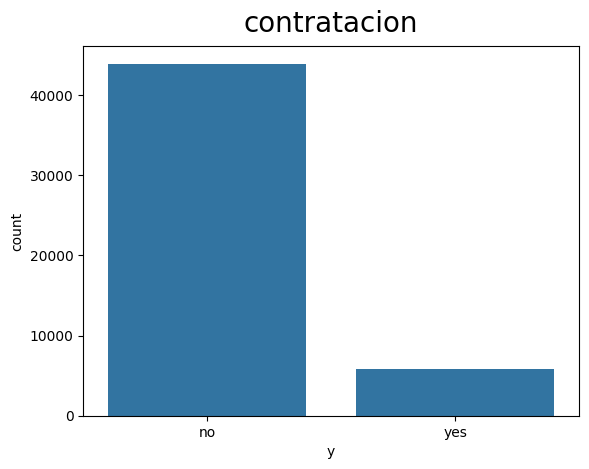

In [11]:
sns.countplot(x=df['y'])
plt.title("contratacion", fontsize=20, verticalalignment='bottom')
plt.show

En el siguiente grafico queda claramente demostrado que cantidad de personas han contratado el servicio, donde se puede apreciar una gran mayoria que no lo ha contratado, se podria reeplantear una hipotesis en donde nos preguntemos, porque No contratan el servicio de plazo fijo? cual o cuales pueden ser lo motivos? sirven realmente las campañas telefonicas?.

### ***Correlacion de variables***

<ipython-input-12-84272757d38e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Wistia')


Text(0.5, 1.0, 'Correlación de Variables')

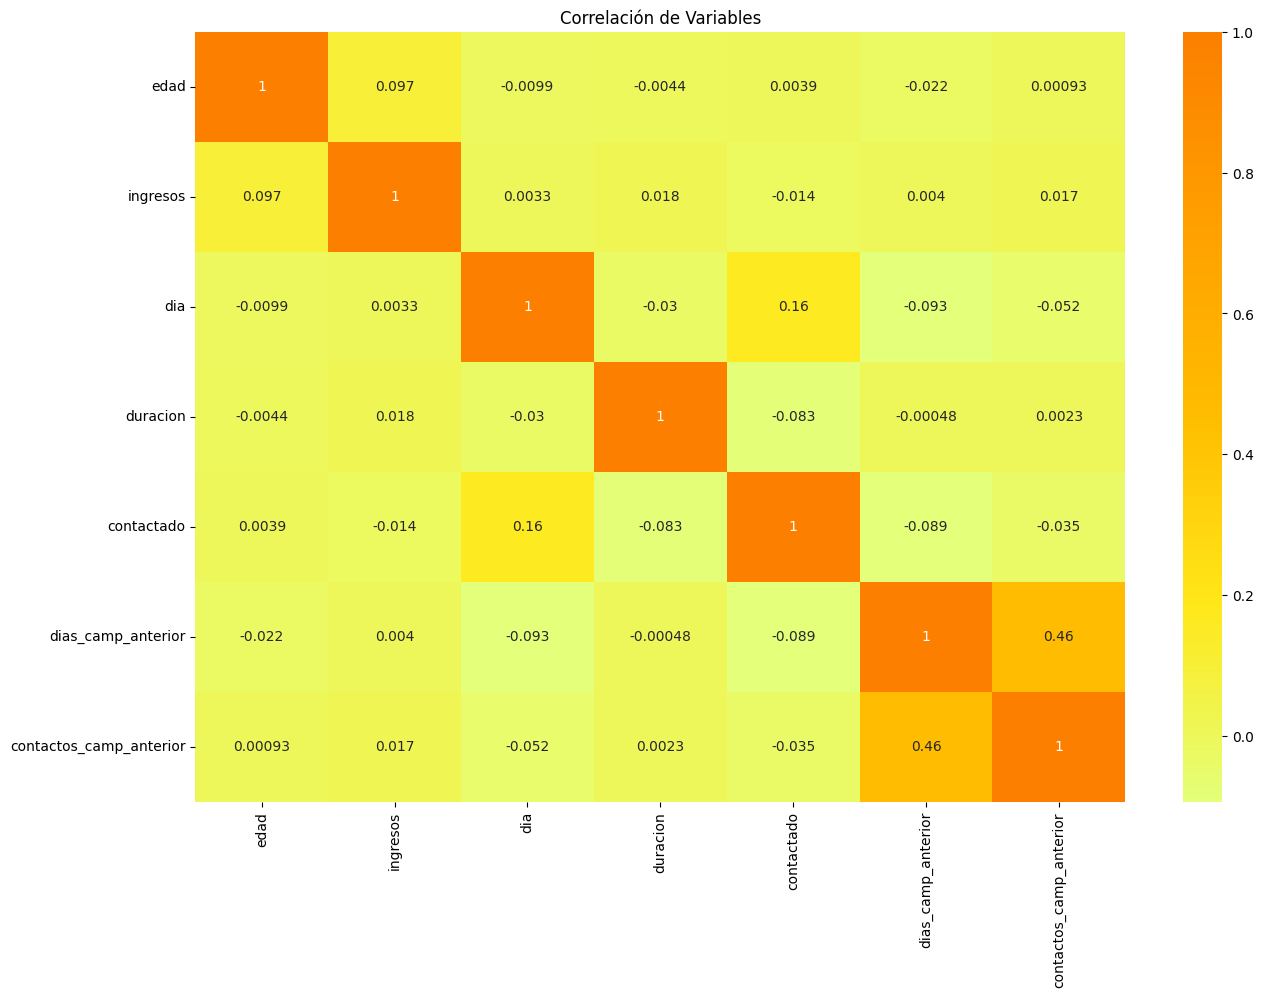

In [12]:
#correlacion de variables
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(df.corr(),annot=True,cmap='Wistia')
plt.title('Correlación de Variables')

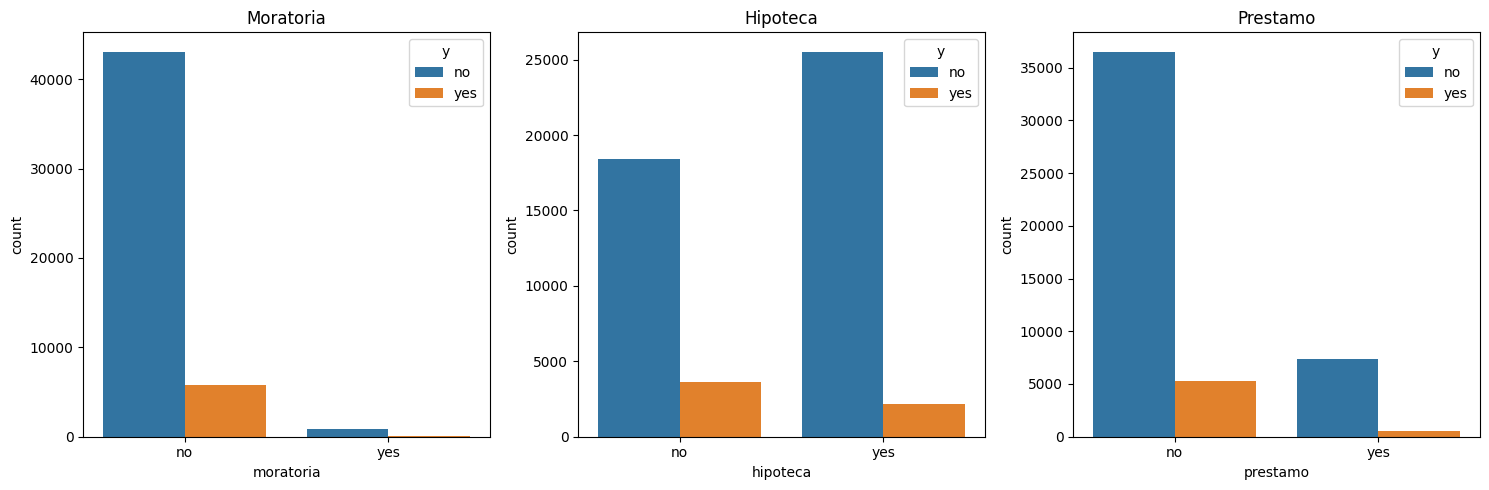

In [13]:
#Influye su situacion crediticia ?
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(data=df, x='moratoria', hue='y', ax=axes[0])
axes[0].set_title('Moratoria')

sns.countplot(data=df, x='hipoteca', hue='y', ax=axes[1],)
axes[1].set_title('Hipoteca')

# Gráfico 3: Box plot
sns.countplot(data=df, x='prestamo', hue='y', ax=axes[2])
axes[2].set_title('Prestamo')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Con respecto a su situacion crediticia, una cuestion logica a la hora de contratar un servicio de plazo fijo, ya que se supone que un contexto de deuda o moratoria seria menos probable que una persona utilice un servicio que esta apuntado al ahorro; podemos ver en primer caso no tantos clientes consumen prestamos y no poseen moratoria, sin embargo un gran numero de clientes si posee un credito hipotecario, en donde se deja ver un pequeño numero de personas que cotratan el servicio de plazo fijo ademas de tener un credito hipotecario, de todas maneras no se visualiza un patron especifico, o una señal para indagar mas por este lado.

Text(0, 0.5, 'ingresos')

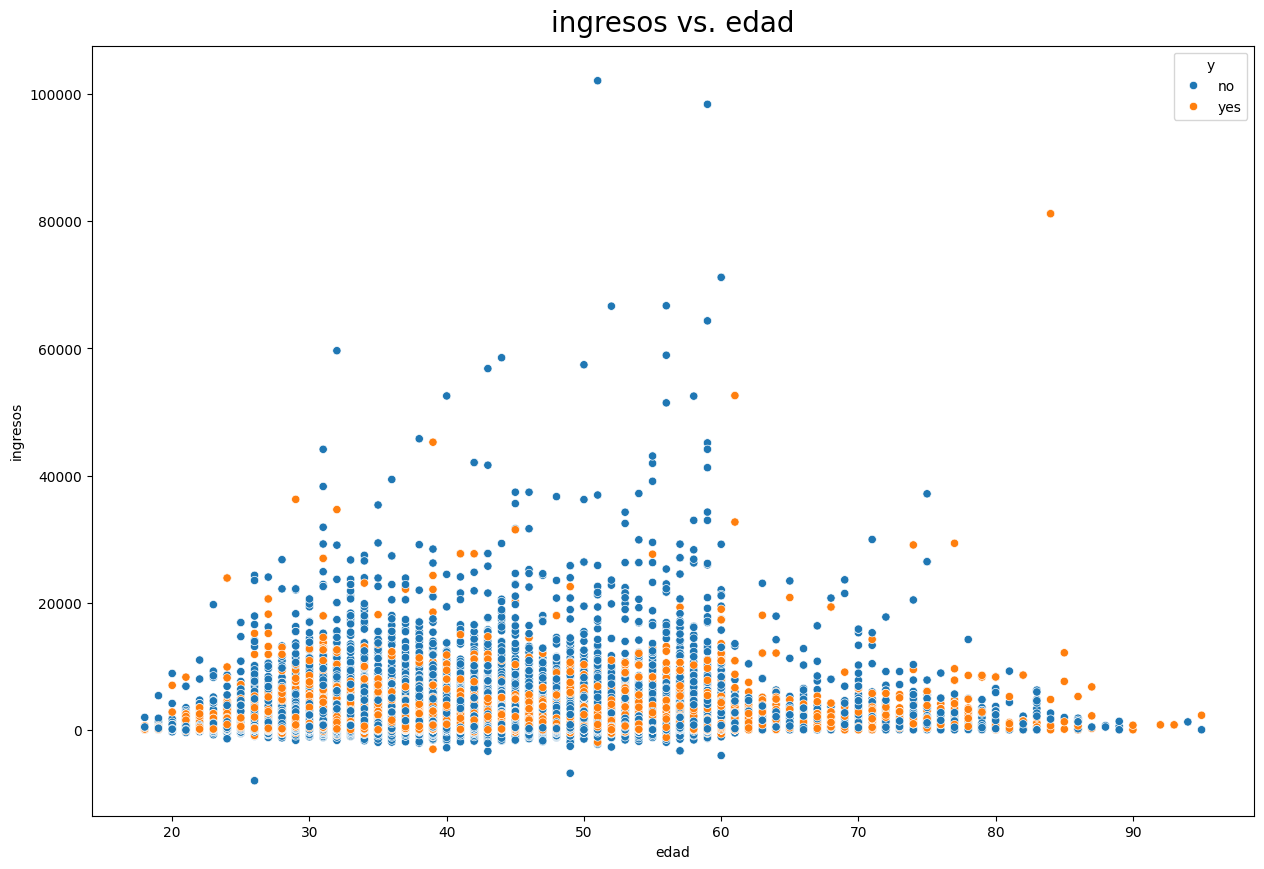

In [14]:
#Influye la edad de los clientes?
sns.scatterplot(x='edad',y='ingresos', hue = 'y', data = df)
plt.title("ingresos vs. edad", fontsize=20, verticalalignment='bottom');
plt.xlabel("edad");
plt.ylabel("ingresos")

En este grafico podemos ver que una gran mayoria no contratan el servicio y que segun la edad y los ingresos no hay parametros especificos que nos brinde señales para determinar contrataciones.

En el siguiente grafico se intenta realizar una comparacion mas que correlacion en donde se quiere mostrar resultados de la campaña de marketing anterior con la prensente, en donde se muestra claro el numero de clientes que no se supo que desicion tomo la campaña anterior, sin embargo dentro de ese grupo es donde se muestra la mayor cantidad de contrataciones. En definitiva, suele ser tentativo que a travez de comunicacion telefonica no queda claro el deseo tentativo del cliente de contratar el servicio o no.

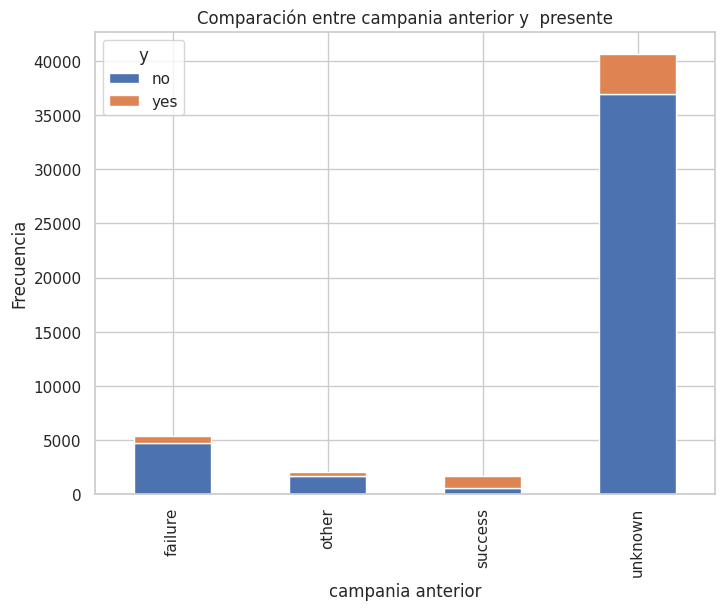

In [15]:
#Existira correlacion entre la ultima campania de marketin telefonico y la presente?

# Crear un gráfico de barras apiladas
sns.set(style="whitegrid")  # Establecer el estilo del gráfico

# Contar las frecuencias de cada categoría en Variable1 y Variable2
count_data = df.groupby(['resultado_camp_anterior', 'y']).size().unstack(fill_value=0)

# Graficar las barras
count_data.plot(kind='bar', stacked=True, figsize=(8, 6))

# Personalizar etiquetas y títulos
plt.xlabel('campania anterior')
plt.ylabel('Frecuencia')
plt.title('Comparación entre campania anterior y  presente')

# Mostrar el gráfico
plt.legend(title='y')
plt.show()

se hara foco en los clientes que han contratado el servicio con el fin de entender un poco mas el porque y encontrar algun patron en comun si es que existe.

In [16]:
# eliminar todos los que no hallan contratado el servicio
df_y = df.copy()
valor = "no"
df_y = df_y.drop(df_y[df_y['y'] == valor].index)
df_y.head()

,edad,tipo_trabajo,estado_civil,educacion,moratoria,ingresos,hipoteca,prestamo,contacto,dia,mes,duracion,contactado,dias_camp_anterior,contactos_camp_anterior,resultado_camp_anterior,y
83,52,services,married,secondary,no,657,no,no,telephone,7,jul,398,2,460,2,failure,yes
129,77,retired,divorced,tertiary,no,4659,no,no,cellular,14,apr,161,1,-1,0,unknown,yes
512,52,technician,married,secondary,no,195,yes,no,cellular,18,feb,220,1,63,5,failure,yes
849,55,housemaid,divorced,primary,no,976,no,no,cellular,28,jun,345,1,94,3,other,yes
1124,37,technician,married,unknown,no,189,no,no,cellular,1,oct,238,1,107,2,success,yes


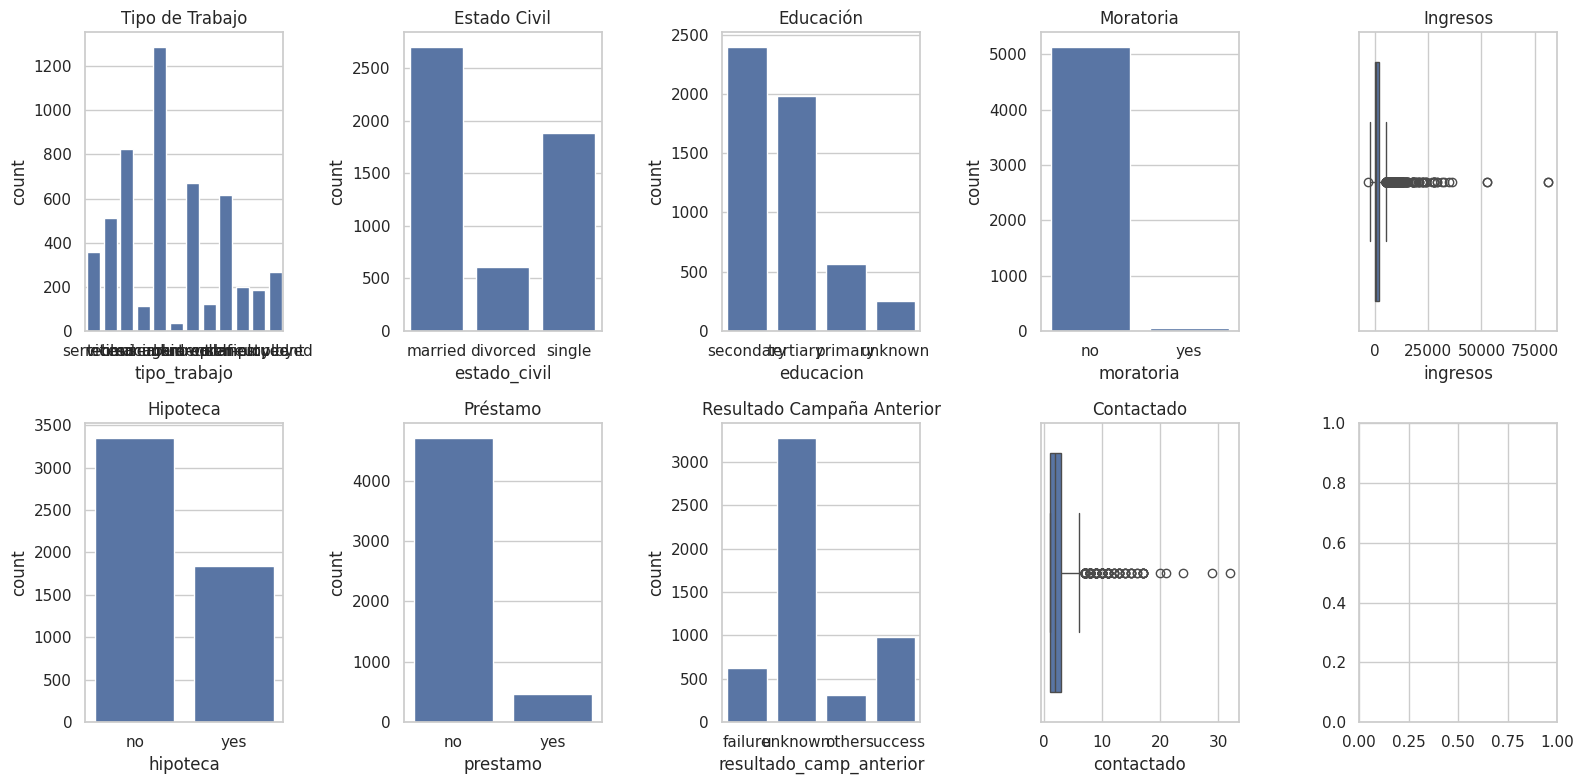

In [17]:
# Crear una figura con una cuadrícula de 2 filas y 5 columnas para los gráficos
fig, axes = plt.subplots(2, 5, figsize=(16, 8))

# Gráfico 1
sns.countplot(data=df_y, x='tipo_trabajo', ax=axes[0, 0])
axes[0, 0].set_title('Tipo de Trabajo')

# Gráfico 2
sns.countplot(data=df_y, x='estado_civil', ax=axes[0, 1])
axes[0, 1].set_title('Estado Civil')

# Gráfico 3
sns.countplot(data=df_y, x='educacion', ax=axes[0, 2])
axes[0, 2].set_title('Educación')

# Gráfico 4
sns.countplot(data=df_y, x='moratoria', ax=axes[0, 3])
axes[0, 3].set_title('Moratoria')

# Gráfico 5
sns.boxplot(data=df_y, x='ingresos', ax=axes[0, 4])
axes[0, 4].set_title('Ingresos')

# Gráfico 6
sns.countplot(data=df_y, x='hipoteca', ax=axes[1, 0])
axes[1, 0].set_title('Hipoteca')

# Gráfico 7
sns.countplot(data=df_y, x='prestamo', ax=axes[1, 1])
axes[1, 1].set_title('Préstamo')

# Gráfico 8
sns.countplot(data=df_y, x='resultado_camp_anterior', ax=axes[1, 2])
axes[1, 2].set_title('Resultado Campaña Anterior')

# Gráfico 9 (nuevo gráfico)
sns.boxplot(data=df_y, x='contactado', ax=axes[1, 3])  # Agregar el nuevo gráfico
axes[1, 3].set_title('Contactado')

# Ajustar la disposición de los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

En este paquete de graficos, a simple viste se deja ver un patron que puede tener vincuo entre los que contratron, y son los grafico relacionados a la parte crediticia, es decir, la mayoria no posee hipoteca, ni mora, ni tampoco prestamos. Vemos tambien que se en la gran mayoria se establecieron pocos contactos telefonicos y que los ingresos no superan los 10mil usd.

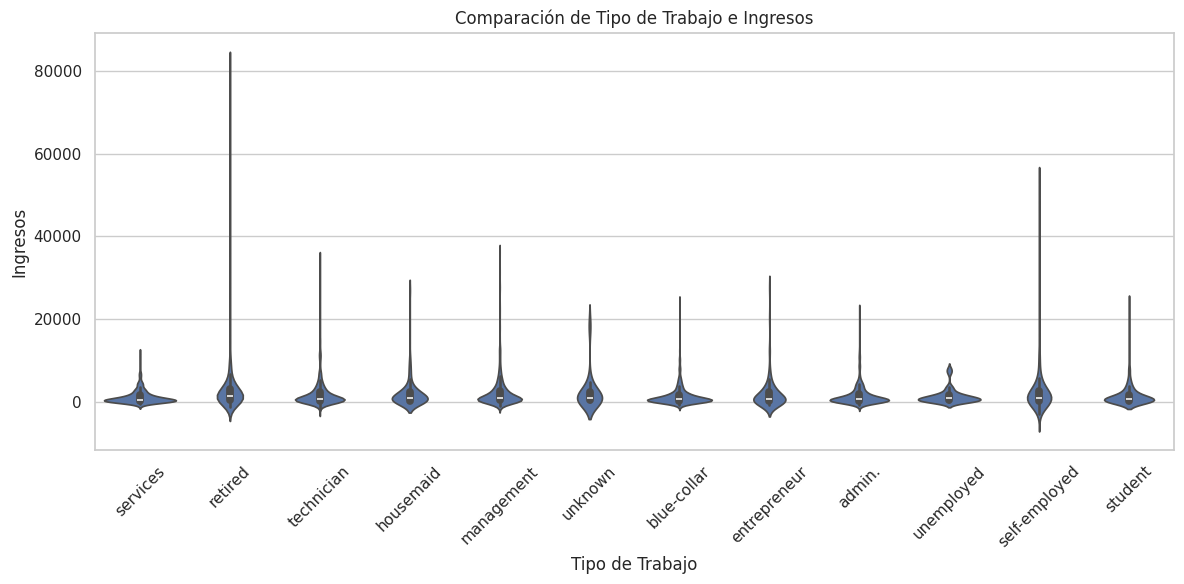

In [18]:
# tipo de trabajo segun ingresos

# Crear un gráfico de violín para comparar el tipo de trabajo y los ingresos
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_y, x='tipo_trabajo', y='ingresos')
plt.title('Comparación de Tipo de Trabajo e Ingresos')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()

En este grafico vemos que retired y self-empoyed son  los que tal vez perciben mejores ingresos

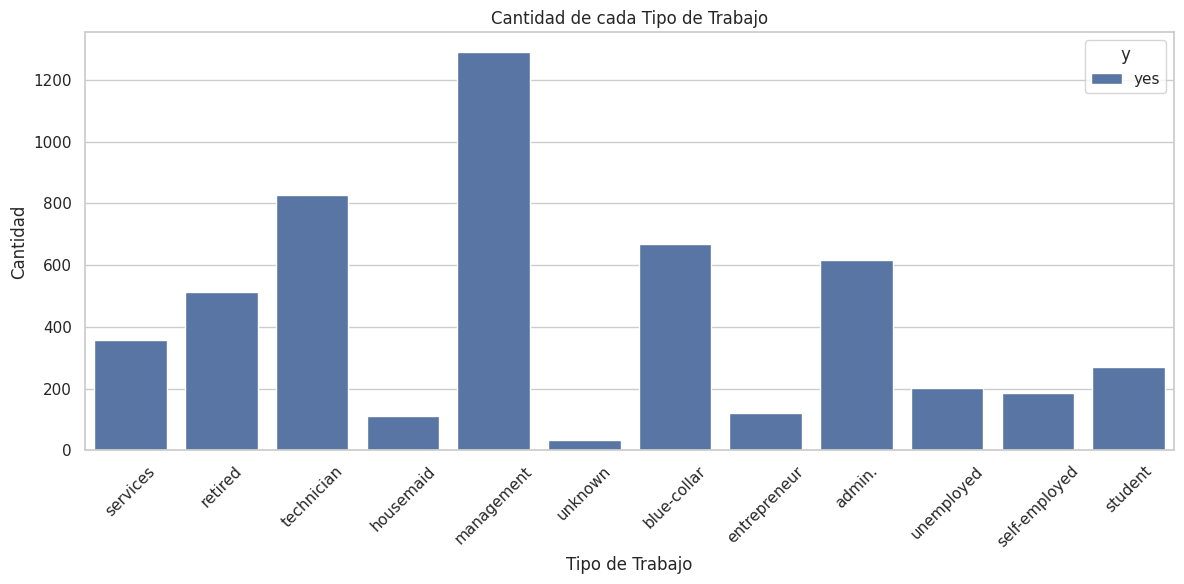

In [19]:
#graficar cual fue el tipo de trabajo que mas contrato el servici

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data = df_y, x='tipo_trabajo', hue='y' )
plt.title('Cantidad de cada Tipo de Trabajo')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este grafico se detecta cuales de las categorias de empleos son las que mas han contratado el servicio sin importar demasiado sus ingresos


<ipython-input-20-e8ebf99c0d47>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_trabajo_counts.index, y=tipo_trabajo_counts.values, palette='viridis')


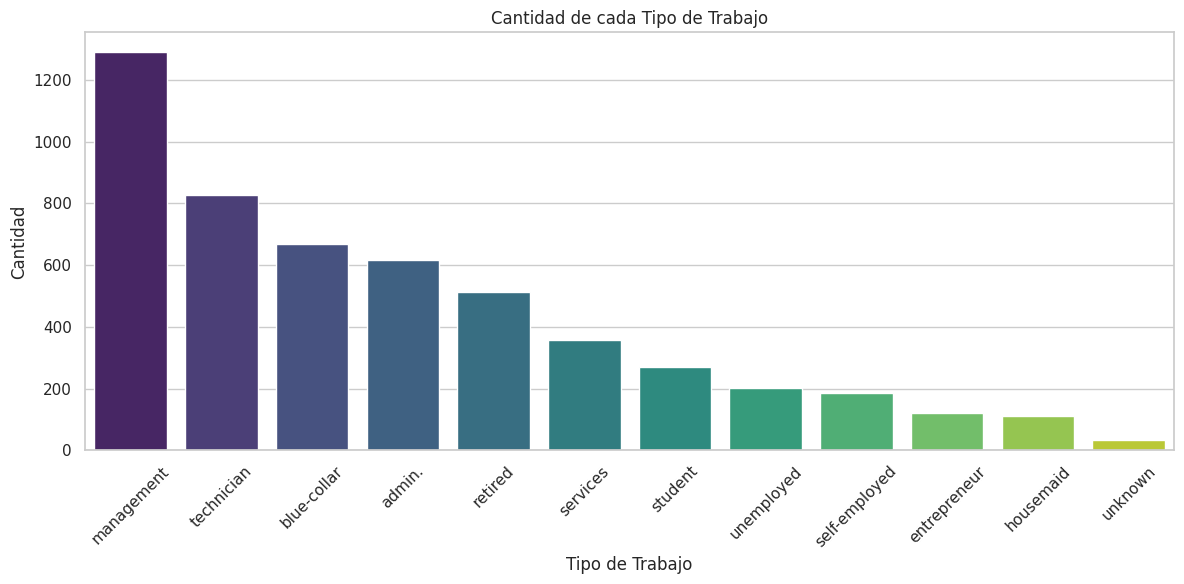

In [20]:
# Calcular el recuento de cada tipo de trabajo
tipo_trabajo_counts = df_y['tipo_trabajo'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=tipo_trabajo_counts.index, y=tipo_trabajo_counts.values, palette='viridis')
plt.title('Cantidad de cada Tipo de Trabajo')
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sin embargo, vemos que management es el tipo de trabajo que mas contrato el servicio, dentro de los contratados, no existe correlacion entre los tipo e trabajo que perciben maores ingresos, como vimos en el grfico anterio

In [21]:
#Preprosesamiento de datos
from sklearn.preprocessing import LabelEncoder
df_le = df.copy()
# Se crea el Label Encoding
le = LabelEncoder()

# Entrenar al encoder:
# 1) fit --> busca la cantidad de clases posibles
# 2) transform --> le asigna un número
label_encoding = le.fit_transform(df['y'])
label_encoding = le.fit_transform(df['moratoria'])
label_encoding = le.fit_transform(df['hipoteca'])
label_encoding = le.fit_transform(df['prestamo'])

In [22]:
# Crear una nueva columna con el resultado del encoding
df_le['y_hat'] = label_encoding
df_le['moratoria_le'] = label_encoding
df_le['hipoteca_le'] = label_encoding
df_le['prestamo_le'] = label_encoding

# Imprimir la cantidad de clases detectadas
print(le.classes_)
df_le.head()

['no' 'yes']


,edad,tipo_trabajo,estado_civil,educacion,moratoria,ingresos,hipoteca,prestamo,contacto,dia,...,duracion,contactado,dias_camp_anterior,contactos_camp_anterior,resultado_camp_anterior,y,y_hat,moratoria_le,hipoteca_le,prestamo_le
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,79,1,-1,0,unknown,no,0,0,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,220,1,339,4,failure,no,1,1,1,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,185,1,330,1,failure,no,0,0,0,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,199,4,-1,0,unknown,no,1,1,1,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,226,1,-1,0,unknown,no,0,0,0,0


In [23]:
#one hot encoding

df_ohe = pd.get_dummies(df_le, columns=['tipo_trabajo','estado_civil','educacion','resultado_camp_anterior'])

In [24]:
df_ok=df_ohe.drop(columns=['moratoria','hipoteca','prestamo','contacto','dia','mes','y'])


In [25]:
#Normalizar datos
scaler = MinMaxScaler()


df_ok.loc[:, 'edad'] = scaler.fit_transform(df_ok[['edad']])
df_ok.loc[:, 'ingresos'] = scaler.fit_transform(df_ok[['ingresos']])
df_ok.loc[:, 'duracion'] = scaler.fit_transform(df_ok[['duracion']])
df_ok.loc[:, 'dias_camp_anterior'] = scaler.fit_transform(df_ok[['dias_camp_anterior']])
# Observar las  5 primeras filas
df_ok.head()


,edad,ingresos,duracion,contactado,dias_camp_anterior,contactos_camp_anterior,y_hat,moratoria_le,hipoteca_le,prestamo_le,...,estado_civil_married,estado_civil_single,educacion_primary,educacion_secondary,educacion_tertiary,educacion_unknown,resultado_camp_anterior_failure,resultado_camp_anterior_other,resultado_camp_anterior_success,resultado_camp_anterior_unknown
0,0.155844,0.089027,0.016063,1,0.000000,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,0.194805,0.116282,0.044734,1,0.389908,4,1,1,1,1,...,1,0,0,1,0,0,1,0,0,0
2,0.220779,0.085060,0.037617,1,0.379587,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3,0.155844,0.086204,0.040464,4,0.000000,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,1
4,0.532468,0.072803,0.045954,1,0.000000,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

In [26]:
# probar algoritmos  xgboost o lightgbm
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
#separar variable de salida
X = df_ok.drop('y_hat', axis=1).values
y = df_ok['y_hat'].values

In [28]:
# dataset de train y test 70%30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### XGBoost

In [29]:
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Entrena el modelo
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [30]:
# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula la precisión y otras métricas de clasificación
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Otras métricas y matrices de confusión
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12587
           1       1.00      1.00      1.00      2333

    accuracy                           1.00     14920
   macro avg       1.00      1.00      1.00     14920
weighted avg       1.00      1.00      1.00     14920

[[12587     0]
 [    0  2333]]


### Lightgbm

In [31]:
# Configura el modelo
model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', random_state=42)

# Entrena el modelo
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5602, number of negative: 29210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 34812, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160922 -> initscore=-1.651387
[LightGBM] [Info] Start training from score -1.651387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier(metric='binary_logloss', objective='binary', random_state=42)

In [32]:
# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test, num_iteration=model.best_iteration_)

# Calcula la precisión y otras métricas de clasificación
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Otras métricas y matrices de confusión
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12587
           1       1.00      1.00      1.00      2333

    accuracy                           1.00     14920
   macro avg       1.00      1.00      1.00     14920
weighted avg       1.00      1.00      1.00     14920

[[12587     0]
 [    0  2333]]


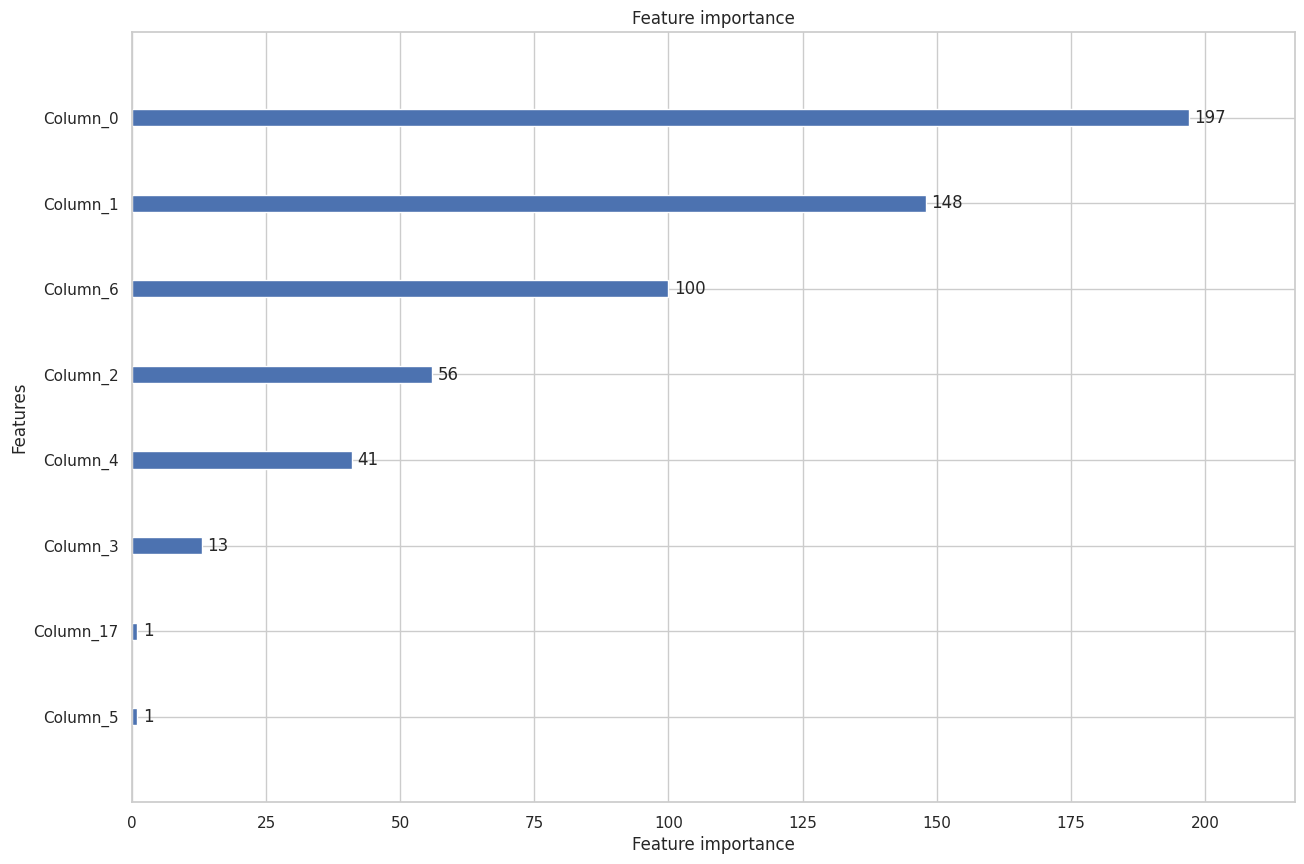

In [33]:
# Visualiza la importancia de las características
lgb.plot_importance(model, max_num_features=10, importance_type='split')
plt.show()

#DecisionTreeClassifier


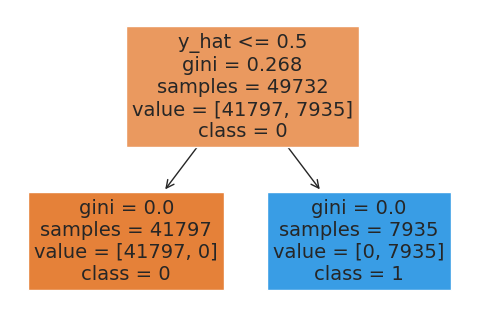

In [34]:
feature_names = df_ok.columns.tolist()  # Obtén los nombres de las columnas del DataFrame
class_names = [str(i) for i in df_ok['y_hat'].unique()]  # Reemplaza 'target_column' con el nombre de tu columna de clases

# ajustar arbol de decisión simple con hiperparametros (defecto)
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
# Graficando
fig = plt.figure(figsize=(6,4))
_ = tree.plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)


#LogisticRegression

In [35]:
model = LogisticRegression(max_iter=10000, n_jobs=-1)
# Ajustar modelo
model.fit(X_train, y_train)
#Predicciones
predic_log = model.predict(X_test)
predic_log

array([0, 1, 0, ..., 0, 0, 0])

#RandomForestClassifier


In [36]:
from sklearn.ensemble import RandomForestClassifier
# Cargamos dataset de cancer de mama
data = df_ok
# definimos matriz de diseño X y vector respuesta y
X = df_ok.drop("y_hat", 1)
y = df_ok['y_hat']
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

<ipython-input-36-e23efcdb194f>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_ok.drop("y_hat", 1)


#Feature selection


In [37]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [39]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for X_train, X_test in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(X_train)}, Test set:{len(X_test)}')
    cnt += 1

Fold:1, Train set: 39785, Test set:9947
Fold:2, Train set: 39785, Test set:9947
Fold:3, Train set: 39786, Test set:9946
Fold:4, Train set: 39786, Test set:9946
Fold:5, Train set: 39786, Test set:9946


# Desicion Classifier

In [40]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1. 1. 1. 1. 1.]
Average score: 1.00


# Logistic Classifier Tuning

In [ ]:
algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for algo in algorithms:
    score = cross_val_score(linear_model.LogisticRegression(max_iter= 4000, solver= algo, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({algo}): {"{:.3f}".format(score.mean())}')

Average score(newton-cg): 1.000
Average score(lbfgs): 1.000
Average score(liblinear): 1.000


KeyboardInterrupt: 

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [ ]:
accuracy_score(y_test,preds,normalize=True)

1.0

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8408
           1       1.00      1.00      1.00      1539

    accuracy                           1.00      9947
   macro avg       1.00      1.00      1.00      9947
weighted avg       1.00      1.00      1.00      9947



In [ ]:
f1_positivo = metrics.f1_score(y_test, preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds, pos_label=0)
f1_positivo, f1_negativo

(1.0, 1.0)

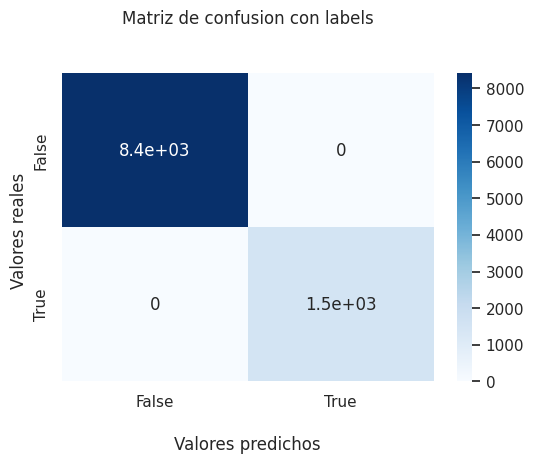

In [ ]:
from sklearn.metrics import confusion_matrix
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, preds)
import seaborn as sns

fig = plt.figure(figsize=(6,4))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

# Conclucion
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">